#### KNearest Neighbors

K 1 olursa overfit olur

Distance ölçmek için methodlar:
    
    Euclidean distance: (L2)
    sqrt(x^2+y^2)
    default metric that SKlearn library of Python uses for K-Nearest Neighbour
    
    Manhattan Distance: (L1)
    |x|+|y|
    This distance is preferred over Euclidean distance when we have a case of high dimensionality.
    
    Minkowsky Distance:
    
    (xi-yi)^p)^1/p p=1 manhattan,p=2 euclidean
    


You can simply use gridsearch to find the best value


pros:
easy to implement
adapts well new data
easy to interpret

cons:
slow to predict
can require lots of memory
no model
knn accuracy will break down  due to curse of dimensionality


*it is sensitive to scaling


KNN regresion için de kullanılabilir.
    
    

##### 3b lab knn

##### Q1

In [2]:
pip install dataset

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
import pickle

In [2]:
churndata=pd.read_pickle('churndata.pkl')

In [3]:
churndata.head()

,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,8779-QRDMV,1,None,No,No,DSL,8,No,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793


In [4]:
df=churndata.drop(columns=['id', 'phone', 'total_revenue', 'cltv', 'churn_score'])

In [7]:
round(df.describe(),2)

,months,gb_mon,monthly,satisfaction,churn_value
count,7043.00,7043.00,7043.00,7043.00,7043.00
mean,32.39,20.52,64.76,3.24,0.27
std,24.54,20.42,30.09,1.20,0.44
min,1.00,0.00,18.25,1.00,0.00
25%,9.00,3.00,35.50,3.00,0.00
50%,29.00,17.00,70.35,3.00,0.00
75%,55.00,27.00,89.85,4.00,1.00
max,72.00,85.00,118.75,5.00,1.00


In [8]:
df.describe(include='object')

,offer,multiple,internet_type,security,backup,protection,support,unlimited,contract,paperless,payment
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,6,2,4,2,2,2,2,2,3,2,3
top,None,No,Fiber Optic,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
freq,3877,4072,3035,5024,4614,4621,4999,4745,3610,4171,3909


#### Question 2

Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric. The non-numeric features will need to be encoded using methods we have discussed in the course.
Start by identifying the number of unique values each variable takes, then create list variables for categorical, numeric, binary, and ordinal variables.
Note that the variable 'months' can be treated as numeric, but it may be more convenient to transform it to an ordinal variable.
For the other categorical variables, examine their values to determine which may be encoded ordinally.

In [31]:
df.columns

'months'

In [36]:
df_uniques=df.nunique()

In [37]:
df_uniques

months             72
offer               6
multiple            2
internet_type       4
gb_mon             50
security            2
backup              2
protection          2
support             2
unlimited           2
contract            3
paperless           2
payment             3
monthly          1585
satisfaction        5
churn_value         2
dtype: int64

In [39]:
binary_variables=list(df_uniques[df_uniques==2].index)

In [40]:
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value']

In [43]:
categorical_variable=list(df_uniques[(df_uniques>2) & (df_uniques<=6)].index)

In [44]:
categorical_variable

['offer', 'internet_type', 'contract', 'payment', 'satisfaction']

In [49]:
[[i,list(df[i].unique())]for i in categorical_variable]

[['offer', ['None', 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A']],
 ['internet_type', ['DSL', 'Fiber Optic', 'Cable', 'None']],
 ['contract', ['Month-to-Month', 'One Year', 'Two Year']],
 ['payment', ['Bank Withdrawal', 'Credit Card', 'Mailed Check']],
 ['satisfaction', [3, 2, 1, 4, 5]]]

In [50]:
ordinal_variables = ['contract', 'satisfaction','months']

In [52]:
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variable) - set(binary_variables))

In [53]:
numeric_variables

['monthly', 'gb_mon']

###### Q3

Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
Scale the data using one of the scaling methods discussed in the course.
Save the processed dataframe as a comma-separated file: 'churndata_processed.csv'

In [54]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder,OrdinalEncoder

In [61]:
lb,le=LabelBinarizer(),LabelEncoder()#ordinal değişkenlerimiz alfabetik sıralama ile olduğu için labelencoder kullnaılıyor

In [57]:
for column in binary_variables:
    df[column]=lb.fit_transform(df[column])

In [58]:
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

In [60]:
df[ordinal_variables].astype('category').describe()

,contract,satisfaction,months
count,7043,7043,7043
unique,3,5,72
top,0,2,0
freq,3610,2665,613


In [62]:
categorical_variable=list(set(categorical_variable)-set(ordinal_variables))

In [63]:
categorical_variable

['payment', 'offer', 'internet_type']

In [64]:
df=pd.get_dummies(df,columns=categorical_variable,drop_first=True)

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,31.386767,24.542061,0.00,8.0,28.00,54.00,71.00
multiple,7043.0,0.421837,0.493888,0.00,0.0,0.00,1.00,1.00
gb_mon,7043.0,20.515405,20.418940,0.00,3.0,17.00,27.00,85.00
security,7043.0,0.286668,0.452237,0.00,0.0,0.00,1.00,1.00
backup,7043.0,0.344881,0.475363,0.00,0.0,0.00,1.00,1.00
protection,7043.0,0.343888,0.475038,0.00,0.0,0.00,1.00,1.00
support,7043.0,0.290217,0.453895,0.00,0.0,0.00,1.00,1.00
unlimited,7043.0,0.673719,0.468885,0.00,0.0,1.00,1.00,1.00
contract,7043.0,0.754792,0.848468,0.00,0.0,0.00,2.00,2.00
paperless,7043.0,0.592219,0.491457,0.00,0.0,1.00,1.00,1.00


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
mm=MinMaxScaler()

In [71]:
for column in [ordinal_variables+numeric_variables]:
    df[column]=mm.fit_transform(df[column])

In [73]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.442,0.346,0.0,0.113,0.394,0.761,1.0
multiple,7043.0,0.422,0.494,0.0,0.000,0.000,1.000,1.0
gb_mon,7043.0,0.241,0.240,0.0,0.035,0.200,0.318,1.0
security,7043.0,0.287,0.452,0.0,0.000,0.000,1.000,1.0
backup,7043.0,0.345,0.475,0.0,0.000,0.000,1.000,1.0
protection,7043.0,0.344,0.475,0.0,0.000,0.000,1.000,1.0
support,7043.0,0.290,0.454,0.0,0.000,0.000,1.000,1.0
unlimited,7043.0,0.674,0.469,0.0,0.000,1.000,1.000,1.0
contract,7043.0,0.377,0.424,0.0,0.000,0.000,1.000,1.0
paperless,7043.0,0.592,0.491,0.0,0.000,1.000,1.000,1.0


In [ ]:
#save
outputfile = 'churndata_processed.csv'
df.to_csv(outputfile, index=False)

###### Question 4
* Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value). 
* Split the sample into training and test samples, with the test sample representing 40% of observations.
* Estimate a K-Nearest Neighbors model, using K=3.
* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
* Use a graphic to illustrate the Confusion Matrix 

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report

In [77]:
## set up x y variable
y,X=df['churn_value'],df.drop(columns='churn_value')

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4,random_state=42)

In [80]:
knn=KNeighborsClassifier(n_neighbors=3)
knn=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy score:',round(accuracy_score(y_test,y_pred),2))
print('F1 score:',round(f1_score(y_test,y_pred),2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2048
           1       0.77      0.72      0.75       770

    accuracy                           0.87      2818
   macro avg       0.84      0.82      0.83      2818
weighted avg       0.86      0.87      0.86      2818

Accuracy score: 0.87
F1 score: 0.75


In [81]:
confusion_matrix(y_test,y_pred)

array([[1887,  161],
       [ 216,  554]], dtype=int64)

In [ ]:
# Plot confusion matrix
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

## Question 5
* Using the same split of training and test samples, estimate another K-Nearest Neighbors model
* This time, use K=5 and weight the results by distance
* Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix.

In [83]:
knn2=KNeighborsClassifier(n_neighbors=5)
knn2=knn2.fit(X_train,y_train)
y_pred2=knn2.predict(X_test)

In [84]:
print(classification_report(y_test,y_pred2))
print('Accuracy score:',round(accuracy_score(y_test,y_pred2),2))
print('F1 score:',round(f1_score(y_test,y_pred2),2))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2048
           1       0.79      0.73      0.76       770

    accuracy                           0.87      2818
   macro avg       0.85      0.83      0.84      2818
weighted avg       0.87      0.87      0.87      2818

Accuracy score: 0.87
F1 score: 0.76


In [85]:
### plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 87.0, 'Ground Truth')

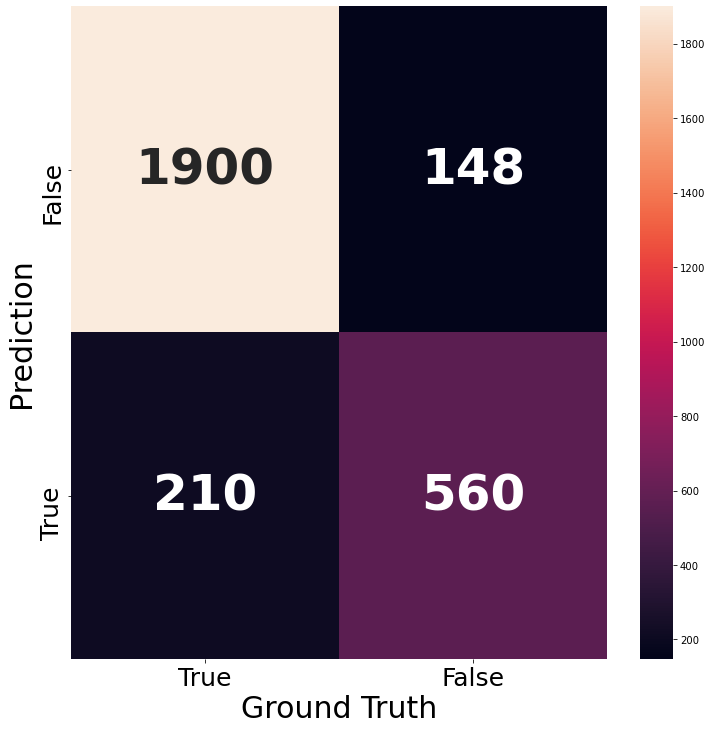

In [101]:
fig,ax=plt.subplots(figsize=(12,12))
ax=sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='d',annot_kws={"size": 50, "weight": "bold"})
##fmt decimal float boş olunca da istediğimiz gibi üstündeki sayıyı ayarlayabiliyoruz. annotkws annot yazıyı ayarlıyor
labels=['True','False']
ax.set_xticklabels(labels,fontsize=25)
ax.set_yticklabels(labels[::-1],fontsize=25)
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

###### Question 6
* To determine the right value for K, examing results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy)
* Generate charts which plot each of these measures as a function of K. 
* What do these charts suggest about the optimal value for K?

In [131]:
max_k=40
f1_scores=list()
error_rates=list()#1-accuracy

for k in range(1,max_k):
    knn=KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn=knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 3000x2000 with 0 Axes>

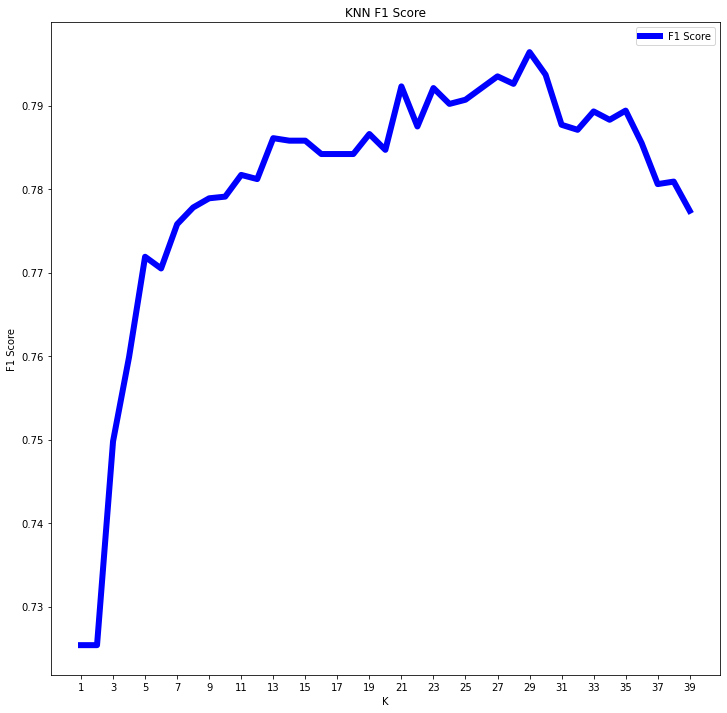

In [132]:
plt.figure(dpi=500)
ax=f1_results.set_index('K').plot(color='b',figsize=(12,12),linewidth=6)
ax.set(xlabel='K',ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN F1 Score')

In [ ]:
plt.figure(dpi=300)
ax = error_results.set_index('K').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

In [124]:
# flights = sns.load_dataset("flights")
# flights2 = flights.pivot("month", "year", "passengers")
# ax = sns.heatmap(flights2)